## Detection

In [1]:
from albumentations.augmentations.crops.transforms import RandomCrop
from albumentations.augmentations.geometric.rotate import Rotate
from albumentations.augmentations.transforms import HorizontalFlip, RGBShift
import cv2
import albumentations as A
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

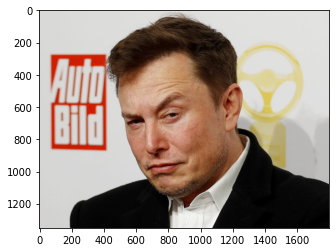

In [6]:
image = cv2.imread("C:\\Users\\91865\\Desktop\\Deep-Learning-Handbook\\Albumenations\\images\\elon.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

bboxes = [[13, 170, 224, 410]]

# Pascal_voc (x_min, y_min, x_max, y_max), YOLO, COCO

In [7]:
transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p=1.0),
    ], bbox_params=A.BboxParams(format="pascal_voc", min_area=2048,
                                min_visibility=0.3, label_fields=[])
)

In [11]:
def visualize_bbox(img, bbox, class_name, color=(255, 0, 0), thickness=5):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = map(int, bbox)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    return img
    
def plot_examples(images, bboxes=None):
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 5

    for i in range(1, len(images)):
        if bboxes is not None:
            img = visualize_bbox(images[i - 1], bboxes[i - 1], class_name="Elon")
        else:
            img = images[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

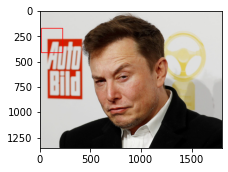

In [13]:
images_list = [image]
saved_bboxes = [bboxes[0]]
for i in range(56):
    augmentations = transform(image=image, bboxes=bboxes)
    augmented_img = augmentations["image"]

    if len(augmentations["bboxes"]) == 0:
        continue

    images_list.append(augmented_img)
    saved_bboxes.append(augmentations["bboxes"][0])

plot_examples(images_list, saved_bboxes)